In [3]:
import uproot
import awkward as ak
import matplotlib.pyplot as plt
fileFromScratch = uproot.open("FromScratch/HIG-RunIIFall18wmNANO.root")
fileFromGenSim = uproot.open("FromRerecoGenSim/HIG-RunIIFall18wmRerecoNANO.root")

In [4]:
jetPt_fromScratch = fileFromScratch["Events"]["Jet_pt"].array()
twoJet_events = ak.num(jetPt_fromScratch, axis=1) >= 2
twoJet_events = twoJet_events[twoJet_events]
print(ak.num(twoJet_events, axis=0))

976


In [20]:
import vector
vector.register_awkward()

jetPt_fromGenSim = fileFromGenSim["Events"]["Jet_pt"].array()



jetPt = fileFromGenSim["Events"]["Jet_pt"].array()
jetEta = fileFromGenSim["Events"]["Jet_eta"].array()
jetPhi = fileFromGenSim["Events"]["Jet_phi"].array()
jetMass = fileFromGenSim["Events"]["Jet_mass"].array()


twoJet_filter = ak.num(jetPt, axis=1) >= 2
# twoJet_events = jetPt_fromGenSim[twoJet_filter]
# print(ak.num(twoJet_events, axis=0))

jet1 = ak.zip({
    "pt": jetPt[twoJet_filter][:,0],
    "eta":jetEta[twoJet_filter][:,0],
    "phi":jetPhi[twoJet_filter][:,0],
    "mass":jetMass[twoJet_filter][:,0],
    },with_name="Momentum4D"
)
jet2 = ak.zip({
    "pt": jetPt[twoJet_filter][:,1],
    "eta":jetEta[twoJet_filter][:,1],
    "phi":jetPhi[twoJet_filter][:,1],
    "mass":jetMass[twoJet_filter][:,1],
    },with_name="Momentum4D"
)
dijet_fromGenSim = jet1+jet2
#--------------------------------------
jetPt = fileFromScratch["Events"]["Jet_pt"].array()
jetEta = fileFromScratch["Events"]["Jet_eta"].array()
jetPhi = fileFromScratch["Events"]["Jet_phi"].array()
jetMass = fileFromScratch["Events"]["Jet_mass"].array()
twoJet_filter = ak.num(jetPt, axis=1) >= 2

jet1 = ak.zip({
    "pt": jetPt[twoJet_filter][:,0],
    "eta":jetEta[twoJet_filter][:,0],
    "phi":jetPhi[twoJet_filter][:,0],
    "mass":jetMass[twoJet_filter][:,0],
    },with_name="Momentum4D"
)
jet2 = ak.zip({
    "pt": jetPt[twoJet_filter][:,1],
    "eta":jetEta[twoJet_filter][:,1],
    "phi":jetPhi[twoJet_filter][:,1],
    "mass":jetMass[twoJet_filter][:,1],
    },with_name="Momentum4D"
)
dijet_fromScratch = jet1+jet2

In [21]:
print(len(dijet_fromScratch))
print(len(dijet_fromGenSim))
print(ak.num(dijet_fromScratch, axis=0))
print(ak.num(dijet_fromGenSim, axis=0))

976
986
976
986


In [22]:
dijet.mass

<Array [37.2, 125, 396, 157, ..., 69.4, 144, 409, 771] type='986 * float32'>

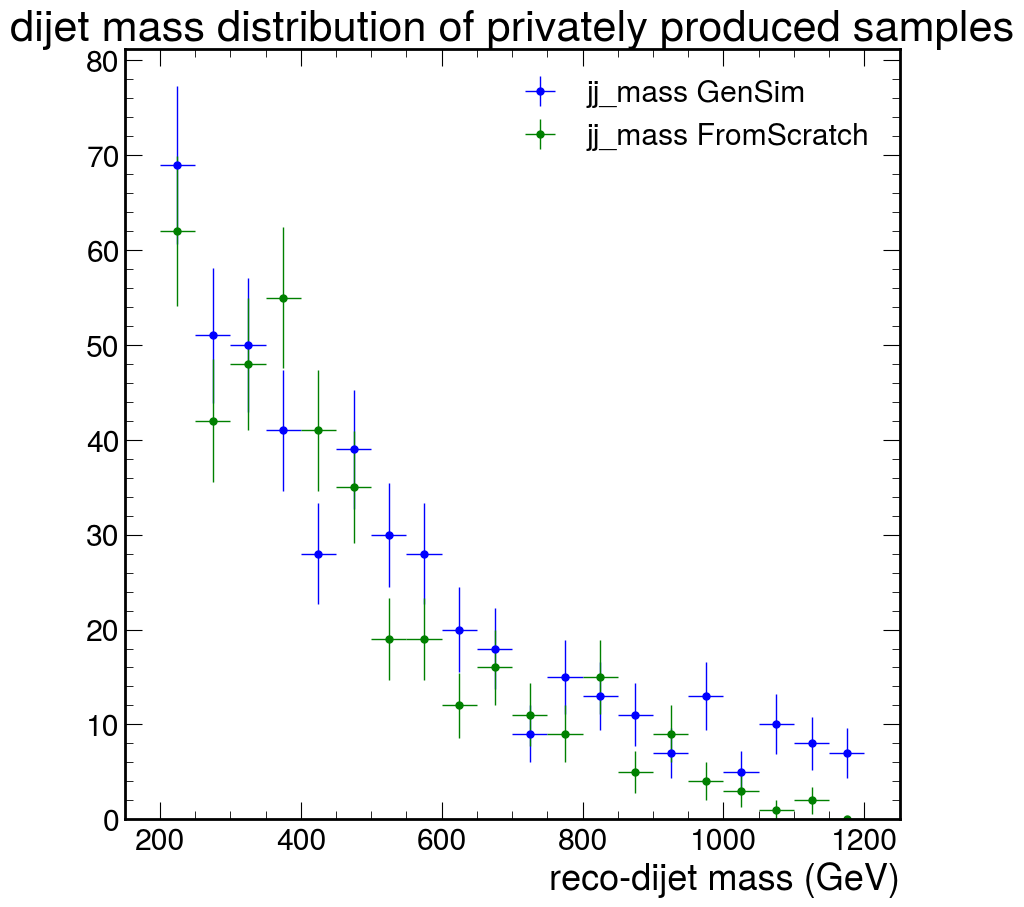

In [7]:
import mplhep as hep
import matplotlib.pyplot as plt
plt.style.use(hep.style.CMS)
import numpy as np

binning_map = {
    "gjj_mass" : [200, 1200, 21],
    "jj_mass" : [200, 1200, 21],
    "jj_dEta" : [0, 9, 21],
}
fig, ax_main = plt.subplots()
binning = np.linspace(*binning_map["jj_mass"])
jj_mass_GenSim, edges = np.histogram(dijet_fromGenSim.mass, bins=binning)
jj_mass_Scratch, edges = np.histogram(dijet_fromScratch.mass, bins=binning)

    
hep.histplot(jj_mass_GenSim, bins=binning, 
         histtype='errorbar', 
        label="jj_mass GenSim", 
         xerr=True, 
         yerr=np.sqrt(jj_mass_GenSim),
        color = "blue",
        ax=ax_main
)
hep.histplot(jj_mass_Scratch, bins=binning, 
         histtype='errorbar', 
        label="jj_mass FromScratch", 
         xerr=True, 
         yerr=np.sqrt(jj_mass_Scratch),
        color = "green",
        ax=ax_main
)

ax_main.set_xlabel("reco-dijet mass (GeV)")
plt.title(f"dijet mass distribution of privately produced samples")
plt.legend(loc="upper right")
plt.show()

In [32]:
import vector
vector.register_awkward()



jetPt = fileFromGenSim["Events"]["GenJet_pt"].array()
jetEta = fileFromGenSim["Events"]["GenJet_eta"].array()
jetPhi = fileFromGenSim["Events"]["GenJet_phi"].array()
jetMass = fileFromGenSim["Events"]["GenJet_mass"].array()


twoGenJet_filter = ak.num(jetPt, axis=1) >= 2


jet1 = ak.zip({
    "pt": jetPt[twoGenJet_filter][:,0],
    "eta":jetEta[twoGenJet_filter][:,0],
    "phi":jetPhi[twoGenJet_filter][:,0],
    "mass":jetMass[twoGenJet_filter][:,0],
    },with_name="Momentum4D"
)
jet2 = ak.zip({
    "pt": jetPt[twoGenJet_filter][:,1],
    "eta":jetEta[twoGenJet_filter][:,1],
    "phi":jetPhi[twoGenJet_filter][:,1],
    "mass":jetMass[twoGenJet_filter][:,1],
    },with_name="Momentum4D"
)
diGenjet_fromGenSim = jet1+jet2
#--------------------------------------
jetPt = fileFromScratch["Events"]["GenJet_pt"].array()
jetEta = fileFromScratch["Events"]["GenJet_eta"].array()
jetPhi = fileFromScratch["Events"]["GenJet_phi"].array()
jetMass = fileFromScratch["Events"]["GenJet_mass"].array()
twoGenJet_filter = ak.num(jetPt, axis=1) >= 2

jet1 = ak.zip({
    "pt": jetPt[twoGenJet_filter][:,0],
    "eta":jetEta[twoGenJet_filter][:,0],
    "phi":jetPhi[twoGenJet_filter][:,0],
    "mass":jetMass[twoGenJet_filter][:,0],
    },with_name="Momentum4D"
)
jet2 = ak.zip({
    "pt": jetPt[twoGenJet_filter][:,1],
    "eta":jetEta[twoGenJet_filter][:,1],
    "phi":jetPhi[twoGenJet_filter][:,1],
    "mass":jetMass[twoGenJet_filter][:,1],
    },with_name="Momentum4D"
)
diGenjet_fromScratch = jet1+jet2

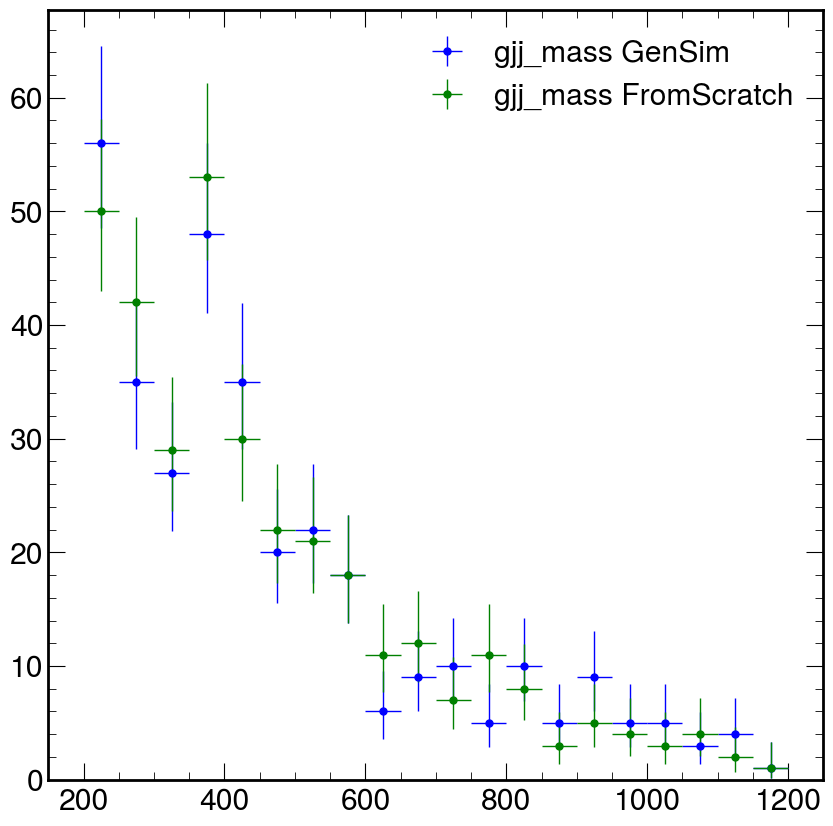

In [33]:
import mplhep as hep
import matplotlib.pyplot as plt
plt.style.use(hep.style.CMS)
import numpy as np

binning_map = {
    "gjj_mass" : [200, 1200, 21],
    "jj_mass" : [200, 1200, 21],
    "jj_dEta" : [0, 9, 21],
}
fig, ax_main = plt.subplots()
binning = np.linspace(*binning_map["jj_mass"])
jj_mass_GenSim, edges = np.histogram(diGenjet_fromGenSim.mass, bins=binning)
jj_mass_Scratch, edges = np.histogram(diGenjet_fromScratch.mass, bins=binning)

    
hep.histplot(jj_mass_GenSim, bins=binning, 
         histtype='errorbar', 
        label="gjj_mass GenSim", 
         xerr=True, 
         # yerr=err_VbfFilter_UL,
        color = "blue",
        ax=ax_main
)
hep.histplot(jj_mass_Scratch, bins=binning, 
         histtype='errorbar', 
        label="gjj_mass FromScratch", 
         xerr=True, 
         # yerr=err_VbfFilter_UL,
        color = "green",
        ax=ax_main
)
plt.legend(loc="upper right")
plt.show()

In [9]:
import vector
vector.register_awkward()

jetPt_fromGenSim = fileFromGenSim["Events"]["Jet_pt"].array()



jetPt = fileFromGenSim["Events"]["Jet_pt"].array()
jetEta = fileFromGenSim["Events"]["Jet_eta"].array()
jetPhi = fileFromGenSim["Events"]["Jet_phi"].array()
jetMass = fileFromGenSim["Events"]["Jet_mass"].array()


twoJet_filter = ak.num(jetPt, axis=1) >= 2
# twoJet_events = jetPt_fromGenSim[twoJet_filter]
# print(ak.num(twoJet_events, axis=0))

jet1 = ak.zip({
    "pt": jetPt[twoJet_filter][:,0],
    "eta":jetEta[twoJet_filter][:,0],
    "phi":jetPhi[twoJet_filter][:,0],
    "mass":jetMass[twoJet_filter][:,0],
    },with_name="Momentum4D"
)
jet2 = ak.zip({
    "pt": jetPt[twoJet_filter][:,1],
    "eta":jetEta[twoJet_filter][:,1],
    "phi":jetPhi[twoJet_filter][:,1],
    "mass":jetMass[twoJet_filter][:,1],
    },with_name="Momentum4D"
)
dijet = jet1+jet2
vbf_cut = (dijet.mass >  400 ) & (jet1.deltaR(jet2) >  2.5)
dijet_fromGenSim = dijet[vbf_cut]

#--------------------------------------
jetPt = fileFromScratch["Events"]["Jet_pt"].array()
jetEta = fileFromScratch["Events"]["Jet_eta"].array()
jetPhi = fileFromScratch["Events"]["Jet_phi"].array()
jetMass = fileFromScratch["Events"]["Jet_mass"].array()
twoJet_filter = ak.num(jetPt, axis=1) >= 2

jet1 = ak.zip({
    "pt": jetPt[twoJet_filter][:,0],
    "eta":jetEta[twoJet_filter][:,0],
    "phi":jetPhi[twoJet_filter][:,0],
    "mass":jetMass[twoJet_filter][:,0],
    },with_name="Momentum4D"
)
jet2 = ak.zip({
    "pt": jetPt[twoJet_filter][:,1],
    "eta":jetEta[twoJet_filter][:,1],
    "phi":jetPhi[twoJet_filter][:,1],
    "mass":jetMass[twoJet_filter][:,1],
    },with_name="Momentum4D"
)
dijet = jet1+jet2
vbf_cut = (dijet.mass >  400 ) & (jet1.deltaR(jet2) >  2.5)
dijet_fromScratch = dijet[vbf_cut]

In [18]:
print(len(dijet_fromScratch))
print(len(dijet_fromGenSim))
print(ak.num(dijet_fromScratch, axis=0))
print(ak.num(dijet_fromGenSim, axis=0))

221
326
221
326


<MomentumArray4D [{rho: 47.5, phi: 0.864, ...}, ...] type='221 * Momentum4D...'>

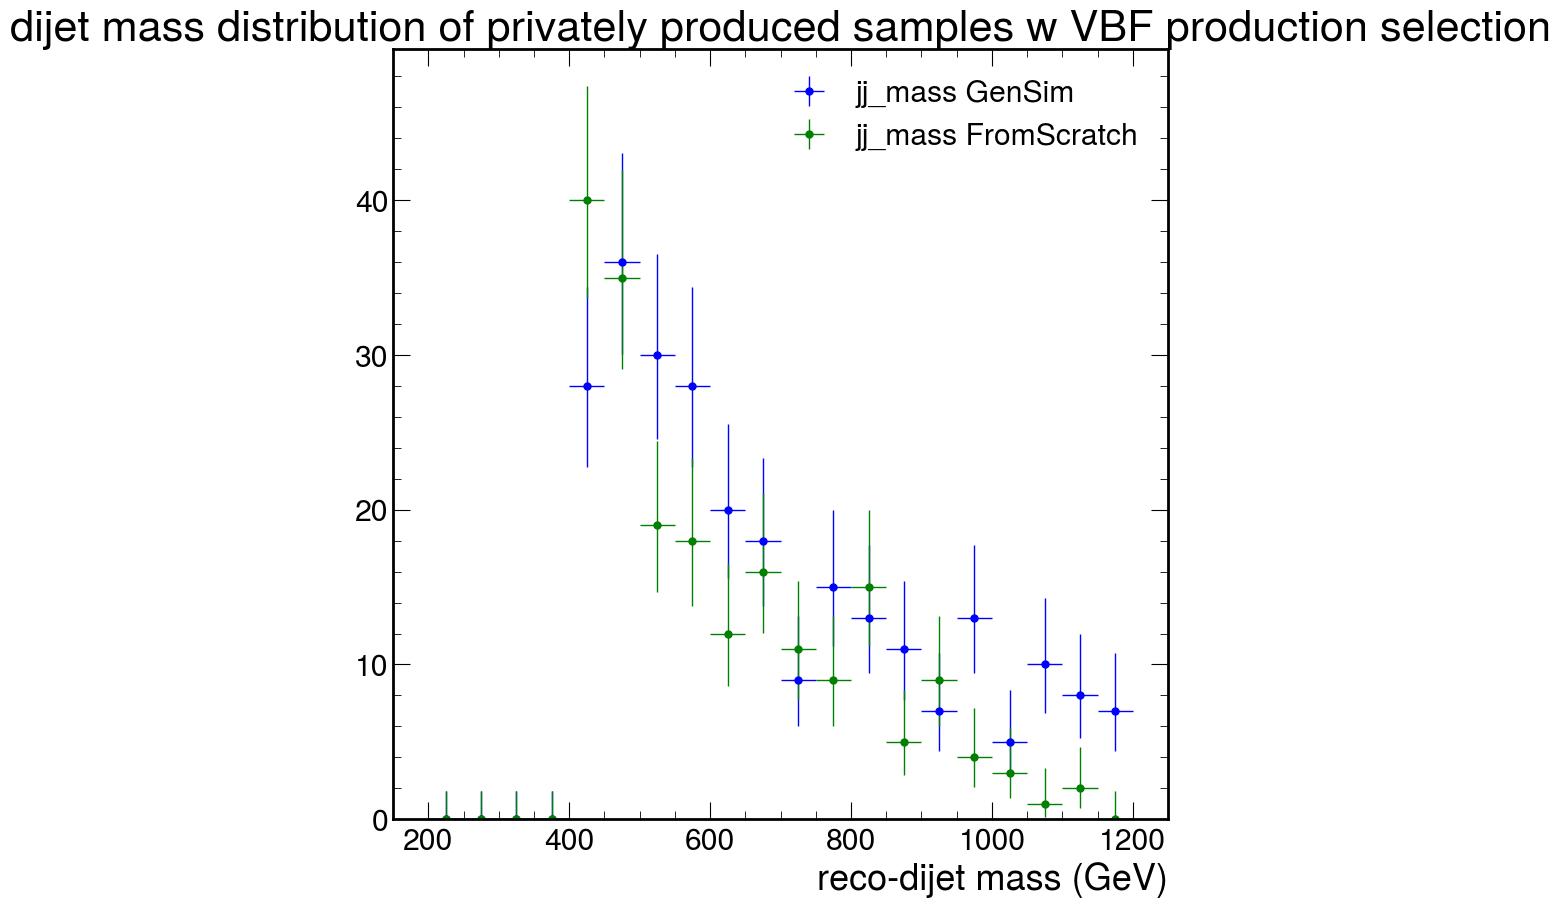

In [10]:
fig, ax_main = plt.subplots()
jj_mass_GenSim, edges = np.histogram(dijet_fromGenSim.mass, bins=binning)
jj_mass_Scratch, edges = np.histogram(dijet_fromScratch.mass, bins=binning)

    
hep.histplot(jj_mass_GenSim, bins=binning, 
         histtype='errorbar', 
        label="jj_mass GenSim", 
         xerr=True, 
         # yerr=err_VbfFilter_UL,
        color = "blue",
        ax=ax_main
)
hep.histplot(jj_mass_Scratch, bins=binning, 
         histtype='errorbar', 
        label="jj_mass FromScratch", 
         xerr=True, 
         # yerr=err_VbfFilter_UL,
        color = "green",
        ax=ax_main
)
ax_main.set_xlabel("reco-dijet mass (GeV)")
plt.title(f"dijet mass distribution of privately produced samples w VBF production selection")
plt.legend(loc="upper right")
plt.show()

In [14]:
print(np.sum(jj_mass_GenSim))
print(np.sum(jj_mass_Scratch))

258.0
199.0


In [ ]:
"""
GenJet vbf-filter plot
"""



jetPt = fileFromGenSim["Events"]["GenJet_pt"].array()
jetEta = fileFromGenSim["Events"]["GenJet_eta"].array()
jetPhi = fileFromGenSim["Events"]["GenJet_phi"].array()
jetMass = fileFromGenSim["Events"]["GenJet_mass"].array()


twoGenJet_filter = ak.num(jetPt, axis=1) >= 2


jet1 = ak.zip({
    "pt": jetPt[twoGenJet_filter][:,0],
    "eta":jetEta[twoGenJet_filter][:,0],
    "phi":jetPhi[twoGenJet_filter][:,0],
    "mass":jetMass[twoGenJet_filter][:,0],
    },with_name="Momentum4D"
)
jet2 = ak.zip({
    "pt": jetPt[twoGenJet_filter][:,1],
    "eta":jetEta[twoGenJet_filter][:,1],
    "phi":jetPhi[twoGenJet_filter][:,1],
    "mass":jetMass[twoGenJet_filter][:,1],
    },with_name="Momentum4D"
)
dijet = jet1+jet2
vbf_cut = (dijet.mass >  400 ) & (jet1.deltaR(jet2) >  2.5)
diGenjet_fromGenSim = dijet[vbf_cut]
#--------------------------------------
jetPt = fileFromScratch["Events"]["GenJet_pt"].array()
jetEta = fileFromScratch["Events"]["GenJet_eta"].array()
jetPhi = fileFromScratch["Events"]["GenJet_phi"].array()
jetMass = fileFromScratch["Events"]["GenJet_mass"].array()
twoGenJet_filter = ak.num(jetPt, axis=1) >= 2

jet1 = ak.zip({
    "pt": jetPt[twoGenJet_filter][:,0],
    "eta":jetEta[twoGenJet_filter][:,0],
    "phi":jetPhi[twoGenJet_filter][:,0],
    "mass":jetMass[twoGenJet_filter][:,0],
    },with_name="Momentum4D"
)
jet2 = ak.zip({
    "pt": jetPt[twoGenJet_filter][:,1],
    "eta":jetEta[twoGenJet_filter][:,1],
    "phi":jetPhi[twoGenJet_filter][:,1],
    "mass":jetMass[twoGenJet_filter][:,1],
    },with_name="Momentum4D"
)

dijet = jet1+jet2
vbf_cut = (dijet.mass >  400 ) & (jet1.deltaR(jet2) >  2.5)
diGenjet_fromScratch = dijet[vbf_cut]